# Matching Samples

In [1]:
import numpy as np

a = np.array(["s1","s2","s3"])
b = np.array(["s4","s3","s6","s1"])

truth_table = (a[:,np.newaxis]==b)

ind = np.where(truth_table==True)

print(a[ind[0]])
print(b[ind[1]])

['s1' 's3']
['s1' 's3']


# Remove Samples

In [2]:
sample_ids = np.array(["s1","s2","s3","s4"])
X = np.random.randn(4,10)
y = np.random.randn(4,1)
print("X: " + str(X.shape))
print("y: " + str(y.shape))
print(sample_ids)
print() 

sample_ids_to_remove = np.array(["s2", "s4"])

#get truth array
truth_table = (sample_ids[:,np.newaxis] == sample_ids_to_remove) 

#get indicies where truth matrix is True
ind = np.where(truth_table==True)

y = np.delete(y, ind[0], axis=0) #remove labels of samples not needed 
X = np.delete(X, ind[0], axis=0) #remove all rows of samples not needed
sample_ids = np.delete(sample_ids, ind[0], axis=0)

print("X: " + str(X.shape))
print("y: " + str(y.shape))
print(sample_ids)

X: (4, 10)
y: (4, 1)
['s1' 's2' 's3' 's4']

X: (2, 10)
y: (2, 1)
['s1' 's3']


# Imputation

### Mean Imputation

In [3]:
X = np.array([[1,np.nan,3],
              [np.nan,5,2],
              [0,6,np.nan]])
#Import Simple Imputer Class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_im = imputer.fit_transform(X)
print(X_im)

[[1.  5.5 3. ]
 [0.5 5.  2. ]
 [0.  6.  2.5]]


### Most Frequent

In [4]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_im = imputer.fit_transform(X)
print(X_im)

[[1. 5. 3.]
 [0. 5. 2.]
 [0. 6. 2.]]


### kNN Imputation

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
X_im = imputer.fit_transform(X)

print(X_im)

[[1.  5.5 3. ]
 [0.5 5.  2. ]
 [0.  6.  2.5]]


## Imputation Example Images

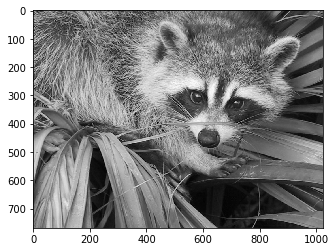

In [6]:
%matplotlib inline
import pylab as pl
import scipy.misc as misc   
    
img = misc.face()

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
img_gray = np.array(img_gray,dtype="int")
pl.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

Missing data 75%: Selecting 589824 random elements


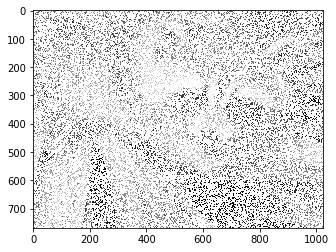

In [7]:
D = img_gray.copy()
missing=0.75 #missing data
nelem = int(np.floor(D.shape[0]*D.shape[1]*missing))
print("Missing data %.0f%%: Selecting %d random elements" % (missing*100.0,nelem))
ind = np.where(D>=0.0)
ind_r = np.random.choice(ind[0].shape[0],nelem,replace=False)
D_missing = np.array(D.copy(),dtype="float") 
D_missing[ind[0][ind_r],ind[1][ind_r]] = np.nan
pl.imshow(D_missing,cmap='gray', vmin=0, vmax=255)

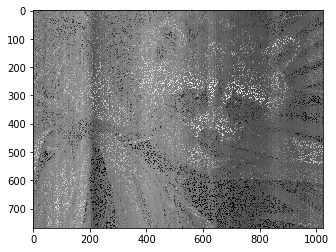

In [8]:
imputer = SimpleImputer(strategy="mean")
img_imp = imputer.fit_transform(D_missing)
pl.imshow(img_imp,cmap='gray', vmin=0, vmax=255)

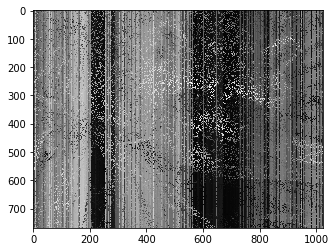

In [9]:
imputer = SimpleImputer(strategy="most_frequent")
img_imp = imputer.fit_transform(D_missing)
pl.imshow(img_imp,cmap='gray', vmin=0, vmax=255)

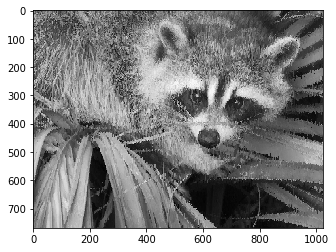

In [10]:
imputer = KNNImputer(n_neighbors=1)
img_imp = imputer.fit_transform(D_missing)
pl.imshow(img_imp,cmap='gray', vmin=0, vmax=255)

# Normalization and Standardization

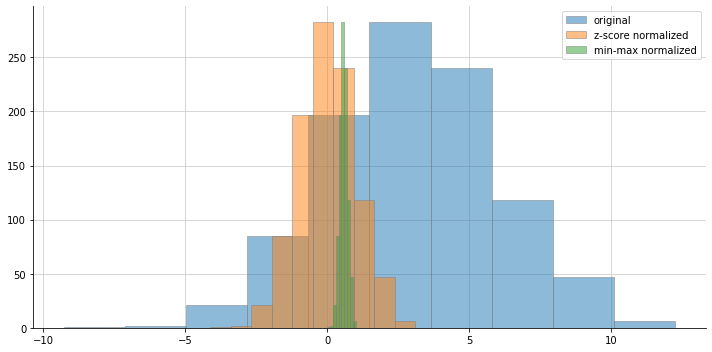

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#toydata
y = np.random.normal(3,3,1000)

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scaler = StandardScaler()
yt = scaler.fit_transform(y[:,np.newaxis])
minmax = MinMaxScaler()
yn = minmax.fit_transform(y[:,np.newaxis])

ax.hist(y,alpha=0.5,edgecolor="grey",label="original",zorder=30)
ax.hist(yt,alpha=0.5,edgecolor="grey",label="z-score normalized",zorder=31)
ax.hist(yn,alpha=0.5,edgecolor="grey",label="min-max normalized",zorder=32)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()